# Environment Module
## Bond Order

In [1]:
import numpy as np
import freud
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

### Setup
Our sample data will be taken from an face-centered cubic (FCC) structure. The array of points is rather large, so that the plots are smooth. Smaller systems may need to use `accumulate` to gather data from multiple frames in order to smooth the resulting array's statistics.

In [2]:
from util import make_fcc
box, points = make_fcc(nx=40, ny=40, nz=40, noise=0.1)
orientations = np.array([[1, 0, 0, 0]]*len(points))

Now we create a `BondOrder` compute object and create some arrays useful for plotting.

In [3]:
rmax = 3 # This is intentionally large
n_bins_theta = 100
n_bins_phi = 100
k = 0 # This parameter is ignored
n = 12 # Chosen for FCC structure
bod = freud.environment.BondOrder(rmax=rmax, k=k, n=n, n_bins_t=n_bins_theta, n_bins_p=n_bins_phi)

phi = np.linspace(0, np.pi, n_bins_phi)
theta = np.linspace(0, 2*np.pi, n_bins_theta)
phi, theta = np.meshgrid(phi, theta)
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

### Computing the Bond Order Diagram
Next, we use the `compute` method and the `bond_order` property to return the array. Note that we use `freud`'s *method chaining* here, where a compute method returns the compute object.

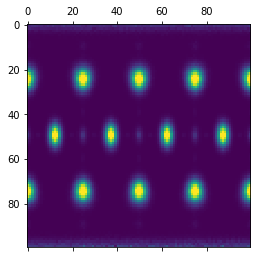

In [4]:
bod_array = bod.compute(box=box, ref_points=points, ref_orientations=orientations, points=points, orientations=orientations).bond_order
bod_array = np.clip(bod_array, 0, np.percentile(bod_array, 99)) # This cleans up bad bins for plotting
plt.matshow(bod_array)
plt.show()

### Plotting on a sphere
This code shows the bond order diagram on a sphere as the sphere is rotated. The code takes a few seconds to run, so be patient.

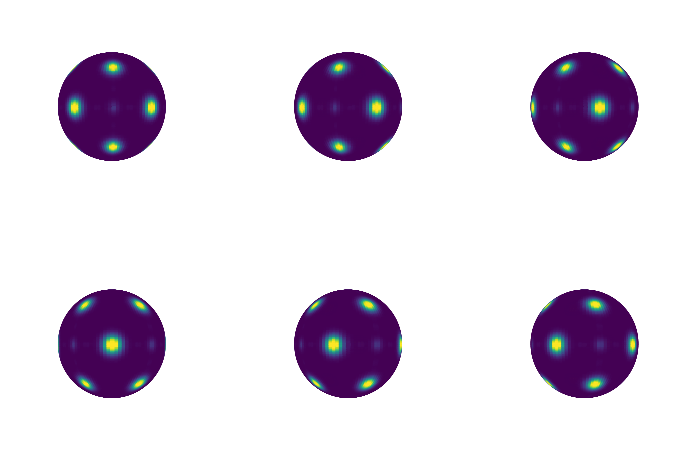

In [5]:
fig = plt.figure(figsize=(12, 8))
for plot_num in range(6):
    ax = fig.add_subplot(231 + plot_num, projection='3d')
    ax.plot_surface(x, y, z, rstride=1, cstride=1, shade=False,
                    facecolors=matplotlib.cm.viridis(bod_array.T / np.max(bod_array)))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.set_axis_off()
    # View angles in degrees
    view_angle = 0, plot_num*15
    ax.view_init(*view_angle)
plt.show()

### Using Neighbor Lists
We can also construct neighbor lists and use those to determine bonds instead of the `rmax` and `n` values in the `BondOrder` constructor. For example, we can filter for a range of bond lengths. Below, we only consider neighbors between $r_{min} = 2.5$ and $r_{max} = 3$ and plot the resulting bond order diagram.

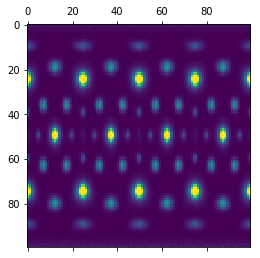

In [6]:
lc = freud.locality.LinkCell(box=box, cell_width=3)
nlist = lc.compute(box, points, points).nlist
nlist.filter_r(box, points, points, rmax=3, rmin=2.5)
bod_array = bod.compute(box=box, ref_points=points, ref_orientations=orientations, points=points, orientations=orientations, nlist=nlist).bond_order
bod_array = np.clip(bod_array, 0, np.percentile(bod_array, 99)) # This cleans up bad bins for plotting
plt.matshow(bod_array)
plt.show()